# Lab Week 3: The mathematical building blocks of neural networks

This lab is based on the materials of the second chapter the course text book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff) (See D2l -> Course Information -> Text Book.)

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the MNIST dataset in Keras

In [2]:
from tensorflow.keras.datasets import mnist
(train_images_orig, train_labels), (test_images_orig, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
train_images_orig.shape # the shape is (b, w, h)

(60000, 28, 28)

In [4]:
train_images_orig.ndim

3

## The shape of image data

**Note:** For black-and-white images, the number of channels equals 1, so it is not explicitly mentioned in the data.

- color images shape: (samples_n, channel_n, hight, width)
- gray images shape: (sample_n, hight, width)


![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/image_data.png)

## Exploring the dataset

sample image shape:  (28, 28)
sample image data type:  <class 'numpy.ndarray'>
printing the numerical value of a sample image
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0  14  25 102  38   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  

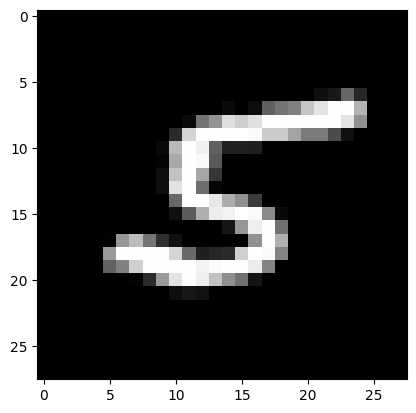

In [7]:
# Note: run this cell multiple times
index = np.random.randint(0, 60000)
sample_image = train_images_orig[index]

print("sample image shape: ", sample_image.shape)
print("sample image data type: ", type(sample_image))

print("=" * 100)
print("printing the numerical value of a sample image")
print(sample_image)

# aligning the pixel values in the output
print("=" * 100)
for row in sample_image:
  print("".join([str(elem).ljust(3) for elem in row]))

print("=" * 100)
plt.imshow(sample_image, cmap="gray")
plt.show()


In [8]:
len(train_labels)

60000

In [9]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
test_images_orig.shape

(10000, 28, 28)

In [11]:
len(test_labels)

10000

In [12]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### **Exercise 1:** Display the fourth image in the `test set` with its label.

Label for the fourth image: 0


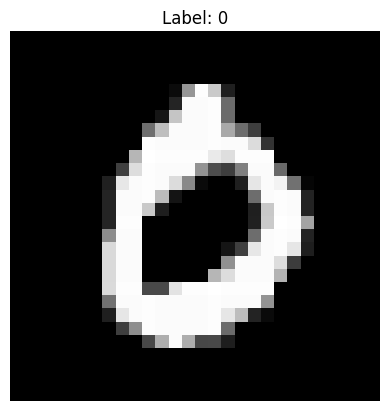

In [13]:
image_index = 3
image = test_images_orig[image_index]
label = test_labels[image_index]

# Print the label
print(f"Label for the fourth image: {label}")

# Display the image
plt.imshow(image, cmap="gray")
plt.title(f"Label: {label}")
plt.axis("off")
plt.show()


# A first look at a neural network

## **Step 1:** The network architecture

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

<img src="https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/architecture.png" width="1000" height="400">

### **Input layer** - Preparing the image data

**Note: The nodes in the `Input layer` are not neurons. They are pixel values.**

In [ ]:
train_images = train_images_orig.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

test_images= test_images_orig.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

### **Exercise 2:** What is the shape of data after preprocessing

In [15]:
train_images = train_images_orig.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

test_images = test_images_orig.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

print("Shape of training data after preprocessing:", train_images.shape)
print("Shape of test data after preprocessing:", test_images.shape)


Shape of training data after preprocessing: (60000, 784)
Shape of test data after preprocessing: (10000, 784)


### Tensor reshaping

In [ ]:
a = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
a.shape

(3, 2)

### **Exercise 3:** reshape the `a` matrix to 6 x 1 matrix.

In [17]:
a = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])

a_reshaped = a.reshape((6, 1))

print("Reshaped matrix:")
print(a_reshaped)
print("Shape of reshaped matrix:", a_reshaped.shape)


Reshaped matrix:
[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]]
Shape of reshaped matrix: (6, 1)


### **Hidden layer** with `relu` activation function

Each neuron in the hidden layer, as illustrated in the figure below, comprises two main components: the summation function and the activation function.

In our architecture, we have 512 neurons in the hidden layer.

<img src=https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/relu.webp with="500" height="300">

**The preferred activation function for hidden layers is `relu`. The mathematical function of ReLU is as follows:**

$$
relu(x) = max(0, x)
$$

> **Note: ReLU is considered as one of the biggest breakthroughs in deep learning because ReLU makes it possible to train a very deep neural network. It has solved the `vanishing gradient` challenge in `deep` networks with many hidden layers.**


### **Exercise 4** Write a function that takes a number/array `x` and returns `relu(x)`. Use the `np.maximum()` method in your function. Then, plot this function for x in the range of -5 to 5.

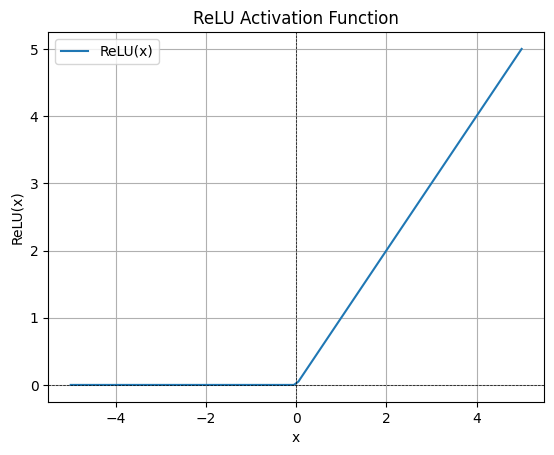

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

x = np.linspace(-5, 5, 100)

y = relu(x)

plt.plot(x, y, label="ReLU(x)")
plt.title("ReLU Activation Function")
plt.xlabel("x")
plt.ylabel("ReLU(x)")
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
plt.legend()
plt.grid()
plt.show()


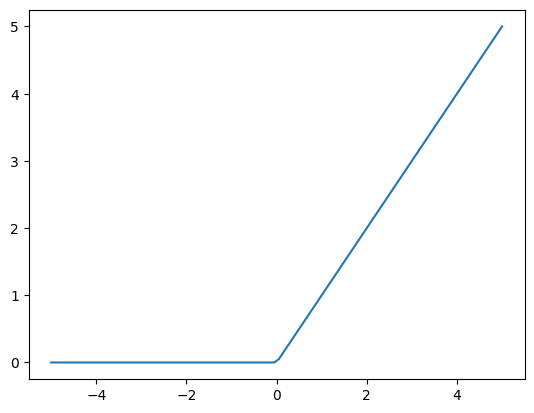

In [ ]:
# my solution output

### **Ecercise 5:** Suppose that I have 5 neurons in my hidden layer. After the summation stage, the result of this layer is `[-10, 5, 0, -2, 6]`. What is the result after passing this through the ReLU activation function?

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/pass-relu.png)

your answer here:
ReLU(-10) = max(0, -10) = 0

ReLU(5) = max(0, 5) = 5

ReLU(0) = max(0, 0) = 0

ReLU(-2) = max(0, -2) = 0

ReLU(6) = max(0, 6) = 6

### **Output layer** - `Sigmoid` and `Softmax` activation function

Each neuron in the last layer of the neural network should output a number between 0 and 1 because each neuron represents the probability of the input belonging to a specific class.

**Important Note:** The values of the neurons in the last layer before applying the activation function are called `logits` or `scores`.

One way to achieve this is by using the sigmoid activation function.

The sigmoid function takes an input
`x` and outputs a number between 0 and 1.

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

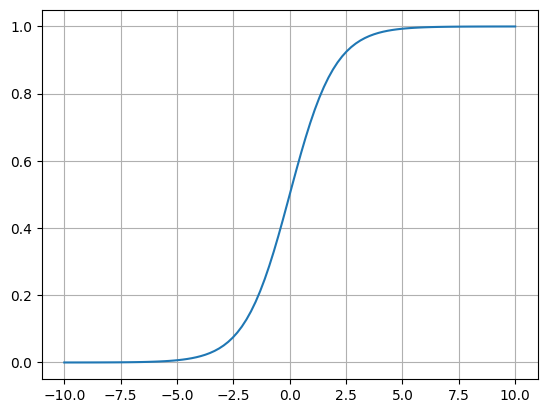

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.plot(x, y)
plt.grid()
plt.show()

### **Exercise 6:** Using the sigmoid function defined in the previous cell, suppose the last layer of a neural network has 4 neurons with the following values: [3.2, 1.3, 0.2, 0.8].
  - Apply the sigmoid function to these values to map them to numbers between 0 and 1.
  - Then, generate a bar plot of the scaled values.

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/pass-sigmoid.png)

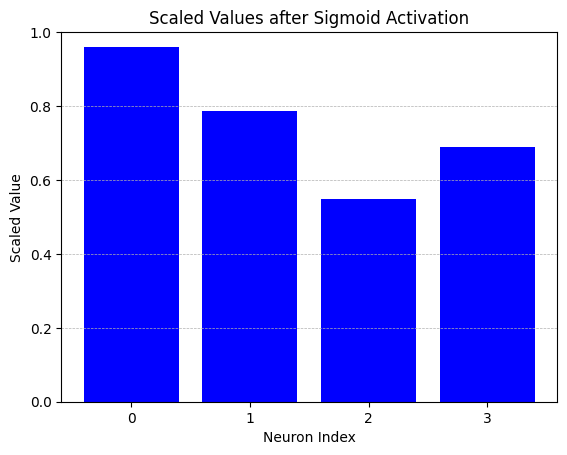

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

logits = np.array([3.2, 1.3, 0.2, 0.8])

logits_scaled = sigmoid(logits)

plt.bar(np.arange(len(logits_scaled)), logits_scaled, color='blue')
plt.title("Scaled Values after Sigmoid Activation")
plt.xlabel("Neuron Index")
plt.ylabel("Scaled Value")
plt.xticks(np.arange(len(logits_scaled)))
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", linewidth=0.5)
plt.show()


[0.96083428 0.78583498 0.549834   0.68997448]


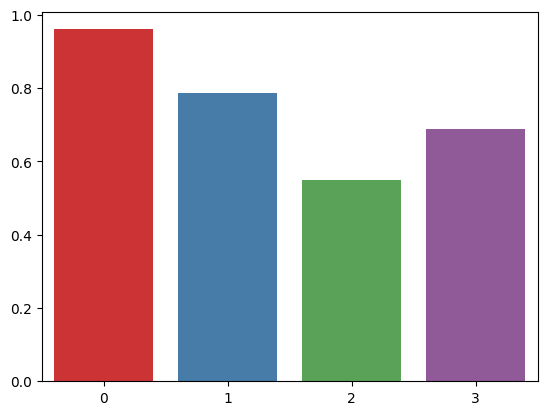

In [ ]:
#my solution output

This plot shows the probability distribution over labels. However, there is an issue here: with the sigmoid function, each output is independent and bounded between 0 and 1, but their sum is not constrained to equal 1. To address this, we use the softmax function, which normalizes the outputs so that they sum to 1, ensuring a valid probability distribution over the labels.


$$
\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^N e^{x_j}}
$$

In [20]:
def softmax(x):
  """
  input x is the output of the last layer of a neural network
  """
  return np.exp(x)/sum(np.exp(x))

### **Exercise 7:** Pass the logits defined in Exercise 6 from the softmax function and plot the probability distribution over the labels.

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/pass-softmax.png)

Softmax probabilities: [0.77514955 0.11593805 0.03859242 0.07031998]
Sum of probabilities: 1.0000000000000002


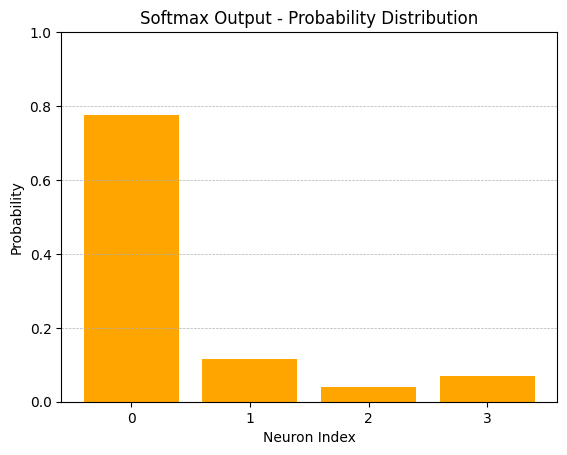

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x)

logits = np.array([3.2, 1.3, 0.2, 0.8])

probs = softmax(logits)

print("Softmax probabilities:", probs)
print("Sum of probabilities:", np.sum(probs))

plt.bar(np.arange(len(probs)), probs, color='orange')
plt.title("Softmax Output - Probability Distribution")
plt.xlabel("Neuron Index")
plt.ylabel("Probability")
plt.xticks(np.arange(len(probs)))
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", linewidth=0.5)
plt.show()


[0.77514955 0.11593805 0.03859242 0.07031998]
sum of all probs:  1.0000000000000002


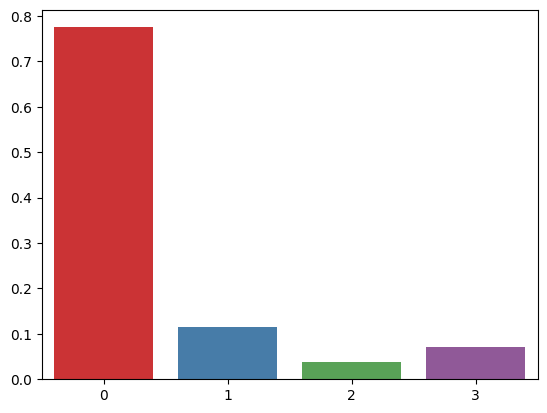

In [ ]:
#my solution output

### Exercise 8: Given the `probs` you calculated in the previous Exercise, find the predicted label using `np.argmax()` method.

In [22]:
#your code here
predicted_class = np.argmax(probs)
print("Predicted class:", predicted_class)


Predicted class: 0


> **To summarize so far, the input to the neural network is, for example, an image, and the output is the probability distribution over the labels.**

> **You can try [Google Teachable Machine](https://teachablemachine.withgoogle.com/train/image) to explore this concept further.**

<img src=https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/overal_logit-softmax.png height="650" width="650" >




In the next steps, we will train the neural network defined in step 1. By training the network, we optimize the weights between the neurons.

## **Step 2:** The compilation step

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

## **Step 3:** "Fitting" the model

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.8736 - loss: 0.4464
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9649 - loss: 0.1159
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9793 - loss: 0.0678
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9846 - loss: 0.0515
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9888 - loss: 0.0380


## **Step 4:** Using the model to make predictions

In [ ]:
test_digits = test_images[:3] #predictiong the label of test_image[0] , test_image[1], test_image[2]
predictions = model.predict(test_digits)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([[5.3813039e-08, 8.8339903e-08, 1.4601770e-05, 6.6420631e-03,
        1.6605675e-11, 4.3978287e-07, 1.0941298e-11, 9.9332482e-01,
        2.3918119e-06, 1.5561984e-05],
       [6.4626519e-08, 4.8077818e-06, 9.9999309e-01, 1.1165381e-06,
        1.8537705e-13, 4.7513544e-07, 8.0789547e-08, 4.5650110e-13,
        2.0799199e-07, 9.8211294e-13],
       [8.9335833e-07, 9.9923730e-01, 1.3652080e-04, 1.5359572e-05,
        1.0737173e-04, 7.1584327e-06, 1.8019173e-05, 3.4408402e-04,
        1.3106359e-04, 2.1893347e-06]], dtype=float32)



```
`# This is formatted as code`
```

### **Exercise 9:** Interpret the values in the `prediction`array.  

your answer here:  
The predictions array contains probabilities for each class (0–9) for the given test images.

Each row represents a test image.
The index with the highest probability in each row is the predicted class.

The sum of each row equals 1 because of the softmax function.

### See the result for the prediction of the first image

In [ ]:
print(predictions[0])
predicted_label = np.argmax(predictions[0])
print("Predicted label: ", predicted_label)

[5.3813039e-08 8.8339903e-08 1.4601770e-05 6.6420631e-03 1.6605675e-11
 4.3978287e-07 1.0941298e-11 9.9332482e-01 2.3918119e-06 1.5561984e-05]
Predicted label:  7


In [ ]:
print("highest prob: ", predictions[0][7])

highest prob:  0.9933248


In [ ]:
true_label = test_labels[0]
print("True label: ", true_label)

True label:  7


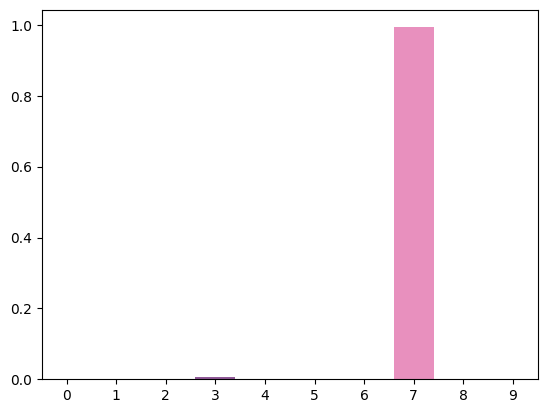

In [ ]:
# plt.bar(np.arange(10), predictions[0])
sns.barplot(x=np.arange(10), y=predictions[0], hue=np.arange(10), palette='Set1', legend=False)
plt.xticks(np.arange(10))
plt.show()

> **So, the output distribution of the model is very close to our ideal distribution, which is [0, 0, 0, 0, 0, 0, 0, 1, 0, 0].**



### **Exercise 10:** Predict the label of the fourth element of the test set.

**Important Note: Neural networks are designed to predict labels for a batch of data. For example, in the previous section, we predicted labels for a batch of four images, where the input shape was (4, 784). Similarly, when working with a single image, it must be fed into the network in the batch format with a shape of (1, 784).**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
Predicted probabilities for the fourth test image: [0.19065832 0.08236402 0.06091931 0.06579525 0.13779542 0.08603249
 0.10669713 0.11109917 0.1121212  0.04651772]
Predicted label for the fourth test image: 0
True label for the fourth test image: 0


<ipython-input-24-c815c3f06121>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(10), y=predictions_fourth[0], palette='Set2')


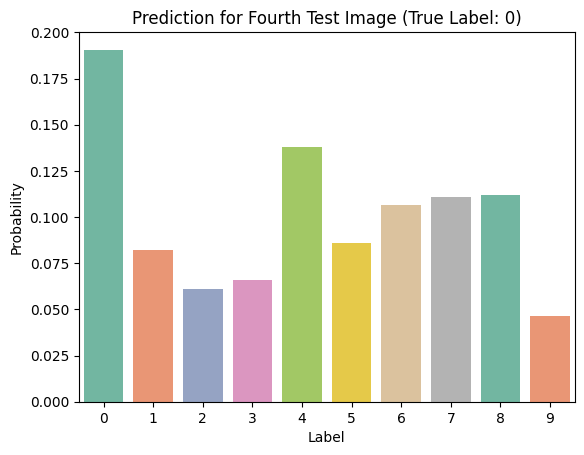

In [24]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

test_image_fourth = test_images[3].reshape(1, -1)
predictions_fourth = model.predict(test_image_fourth)
print("Predicted probabilities for the fourth test image:", predictions_fourth[0])
predicted_label = np.argmax(predictions_fourth[0])
print("Predicted label for the fourth test image:", predicted_label)
true_label = test_labels[3]
print("True label for the fourth test image:", true_label)
sns.barplot(x=np.arange(10), y=predictions_fourth[0], palette='Set2')
plt.title(f"Prediction for Fourth Test Image (True Label: {true_label})")
plt.xlabel("Label")
plt.ylabel("Probability")
plt.xticks(np.arange(10))
plt.show()


## **Step 5:** Evaluating the model on new data

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9776 - loss: 0.0736
test_acc: 0.9807999730110168


**Note:** We will discuss `optimizer`, `loss`, `epoch`, and `batch` in more depth in the coming weeks.